In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
hf=pd.read_csv('/content/HP Feature.csv')
hub=pd.read_csv('/content/HP User Behaviour.csv')

In [ ]:
hf.head()

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied\n Per Month
0,3526,55.5Y,25.2 Years,Supply Chain/Procurement,21,NaN,white,1.75
1,3787,48.6Y,24.10 Years,Supply Chain/Procurement,33,1.0,white,2.75
2,7610,55.2Y,18.10 Years,IT/Telecommunication,30,NaN,white,2.50
3,16413,46.6Y,22.4 Years,Garments/Textile,21,NaN,white,1.75
4,19621,52.6Y,24.10 Years,General Management/Admin,32,2.0,white,2.67


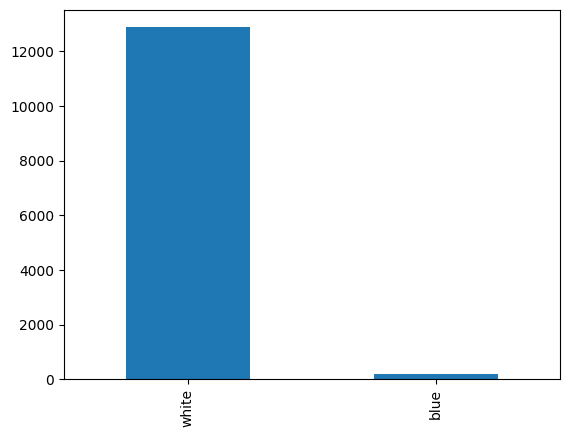

In [ ]:
hf['B/W'].value_counts().plot(kind='bar')
plt.savefig('plot.png')

In [ ]:
hf['Shortlisted'].replace(np.nan,0,inplace=True)

In [ ]:
hf.rename(columns={'AvgJobsApplied\n Per Month':'AvgJobsApplied'}, inplace=True)

In [ ]:
hf.head()

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied
0,3526,55.5Y,25.2 Years,Supply Chain/Procurement,21,0.0,white,1.75
1,3787,48.6Y,24.10 Years,Supply Chain/Procurement,33,1.0,white,2.75
2,7610,55.2Y,18.10 Years,IT/Telecommunication,30,0.0,white,2.50
3,16413,46.6Y,22.4 Years,Garments/Textile,21,0.0,white,1.75
4,19621,52.6Y,24.10 Years,General Management/Admin,32,2.0,white,2.67


In [ ]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         13075 non-null  int64  
 1   Age             13074 non-null  object 
 2   Exp             13075 non-null  object 
 3   Cat             13074 non-null  object 
 4   TotalApply      13075 non-null  int64  
 5   Shortlisted     13075 non-null  float64
 6   B/W             13074 non-null  object 
 7   AvgJobsApplied  13075 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 817.3+ KB


In [ ]:
hf['Age']=hf['Age'].str[:4]

In [ ]:
hf['Exp']=hf['Exp'].str.split(' ').str[0]

In [ ]:
for col in hf[['Age', 'Exp']].columns:
    if hf[col].dtype == 'object':
        hf[col] = pd.to_numeric(hf[col], errors='coerce')

In [ ]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         13075 non-null  int64  
 1   Age             13074 non-null  float64
 2   Exp             13075 non-null  float64
 3   Cat             13074 non-null  object 
 4   TotalApply      13075 non-null  int64  
 5   Shortlisted     13075 non-null  float64
 6   B/W             13074 non-null  object 
 7   AvgJobsApplied  13075 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 817.3+ KB


In [ ]:
hf.describe()

,User ID,Age,Exp,TotalApply,Shortlisted,AvgJobsApplied
count,1.307500e+04,13074.000000,13075.000000,13075.000000,13075.000000,13075.000000
mean,2.871564e+06,32.567454,7.113555,25.928260,0.838776,2.160519
std,1.556810e+06,6.444275,5.972321,4.412846,1.078888,0.367904
min,3.526000e+03,12.100000,0.000000,21.000000,0.000000,1.750000
25%,1.492928e+06,28.100000,2.800000,22.000000,0.000000,1.830000
50%,2.887952e+06,30.900000,5.800000,25.000000,1.000000,2.080000
75%,4.246434e+06,35.500000,9.900000,29.000000,1.000000,2.420000
max,5.663849e+06,69.500000,51.600000,41.000000,10.000000,3.420000


In [ ]:
hf[hf['Exp']==51.60]

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied
1555,848749,64.2,51.6,Agro (Plant/Animal/Fisheries),24,2.0,white,2.0


<Axes: >

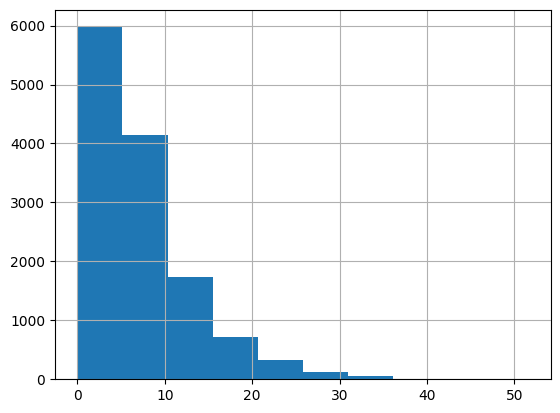

In [ ]:
hf['Exp'].hist()

<ipython-input-109-aea5e5569f67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hf.corr())


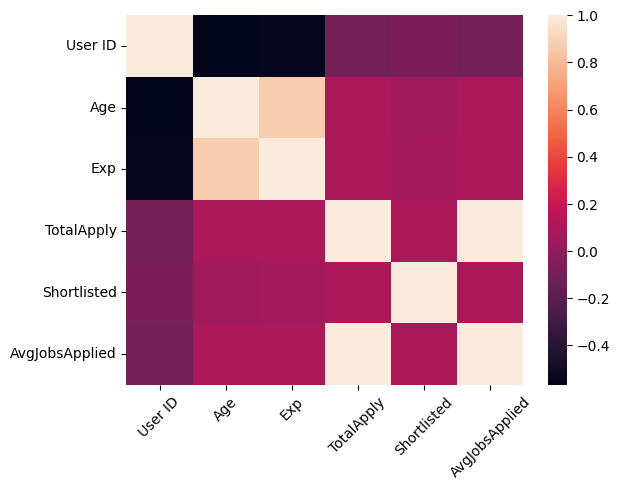

In [ ]:
sns.heatmap(hf.corr())
plt.xticks(rotation=45)
plt.savefig('corr.png')

In [ ]:
hfdf=pd.DataFrame(hf['Cat'].value_counts())

In [ ]:
hfdf.reset_index(inplace=True)

In [ ]:
hfdf.columns

Index(['index', 'Cat'], dtype='object')

In [ ]:
hfdf.sort_values(['index'])

,index,Cat
0,Accounting/Finance,2557
16,Agro (Plant/Animal/Fisheries),71
2,Bank/Non-Bank Fin. Institution,1476
44,Beauty Care/ Health & Fitness,2
41,CAD Operator,3
42,Chef/Cook,3
14,Commercial,77
13,Customer Service/Call Centre,85
19,Data Entry/Computer Operator,56
15,Data Entry/Operator/BPO,71


In [ ]:
hf

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied
0,3526,55.5,25.2,Supply Chain/Procurement,21,0.0,white,1.75
1,3787,48.6,24.1,Supply Chain/Procurement,33,1.0,white,2.75
2,7610,55.2,18.1,IT/Telecommunication,30,0.0,white,2.50
3,16413,46.6,22.4,Garments/Textile,21,0.0,white,1.75
4,19621,52.6,24.1,General Management/Admin,32,2.0,white,2.67
...,...,...,...,...,...,...,...,...
13070,5622256,36.7,4.2,Medical/Pharma,23,1.0,white,1.92
13071,5624997,25.1,0.6,Engineer/Architect,23,1.0,white,1.92
13072,5632429,26.4,2.4,Accounting/Finance,21,0.0,white,1.75
13073,5660539,29.9,5.1,General Management/Admin,21,1.0,white,1.75


In [119]:
labels=['12-20','20-25','25-30','30-40','40-100']
bins=[12,20,25,30,40,100]

hf['AgeCat']=pd.cut(hf['Age'],labels=labels,bins=bins)

In [120]:
hf

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied,AgeCat,ExpCat
0,3526,55.5,25.2,Supply Chain/Procurement,21,0.0,white,1.75,40-100,Veteran15<
1,3787,48.6,24.1,Supply Chain/Procurement,33,1.0,white,2.75,40-100,Veteran15<
2,7610,55.2,18.1,IT/Telecommunication,30,0.0,white,2.50,40-100,Veteran15<
3,16413,46.6,22.4,Garments/Textile,21,0.0,white,1.75,40-100,Veteran15<
4,19621,52.6,24.1,General Management/Admin,32,2.0,white,2.67,40-100,Veteran15<
...,...,...,...,...,...,...,...,...,...,...
13070,5622256,36.7,4.2,Medical/Pharma,23,1.0,white,1.92,30-40,Beginner2-5
13071,5624997,25.1,0.6,Engineer/Architect,23,1.0,white,1.92,25-30,Fresher0-2
13072,5632429,26.4,2.4,Accounting/Finance,21,0.0,white,1.75,25-30,Beginner2-5
13073,5660539,29.9,5.1,General Management/Admin,21,1.0,white,1.75,25-30,Experienced5-10


In [121]:
labels=['0-2','2-5','5-10','10-15','15<']
bins=[0,2,5,10,15,100]

hf['ExpCat']=pd.cut(hf['Exp'],labels=labels,bins=bins)

In [122]:
hf

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied,AgeCat,ExpCat
0,3526,55.5,25.2,Supply Chain/Procurement,21,0.0,white,1.75,40-100,15<
1,3787,48.6,24.1,Supply Chain/Procurement,33,1.0,white,2.75,40-100,15<
2,7610,55.2,18.1,IT/Telecommunication,30,0.0,white,2.50,40-100,15<
3,16413,46.6,22.4,Garments/Textile,21,0.0,white,1.75,40-100,15<
4,19621,52.6,24.1,General Management/Admin,32,2.0,white,2.67,40-100,15<
...,...,...,...,...,...,...,...,...,...,...
13070,5622256,36.7,4.2,Medical/Pharma,23,1.0,white,1.92,30-40,2-5
13071,5624997,25.1,0.6,Engineer/Architect,23,1.0,white,1.92,25-30,0-2
13072,5632429,26.4,2.4,Accounting/Finance,21,0.0,white,1.75,25-30,2-5
13073,5660539,29.9,5.1,General Management/Admin,21,1.0,white,1.75,25-30,5-10


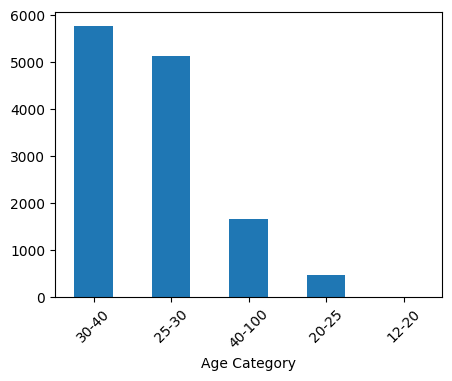

In [127]:
fig, ax = plt.subplots(figsize=(5, 3.7))
hf['AgeCat'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Age Category')

plt.savefig('AgeCat2.png')

#plt.savefig('plot3.png')

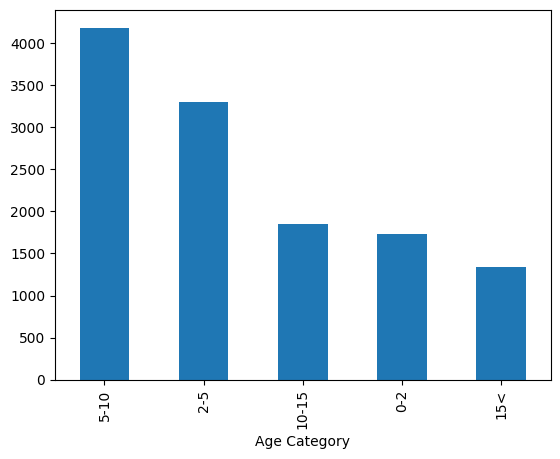

In [126]:
hf['ExpCat'].value_counts().plot(kind='bar')
plt.xlabel('Age Category')
plt.savefig('plot4.png')

<ipython-input-125-a07f2b7f29f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hf.groupby(['ExpCat']).mean()['Shortlisted'].plot(kind='bar')


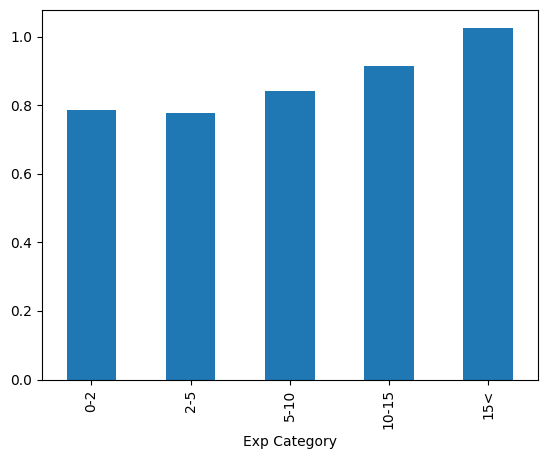

In [125]:
hf.groupby(['ExpCat']).mean()['Shortlisted'].plot(kind='bar')
plt.xlabel('Exp Category')
plt.savefig('SHortlisted-Exp.png')

<ipython-input-81-c476dd40e651>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hf.groupby(['AgeCat']).mean()['Shortlisted'].plot(kind='bar')


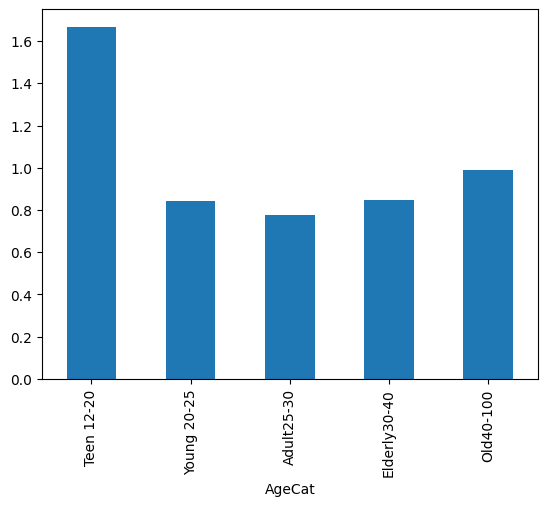

In [ ]:
hf.groupby(['AgeCat']).mean()['Shortlisted'].plot(kind='bar')
plt.savefig('SHortlisted-Age.png')

In [ ]:
hfdf.to_csv('HFDF.csv')

In [ ]:
hfdf1=pd.read_csv('/content/HFDF1.csv')

In [ ]:
hfdf1['SizeRatio']=hfdf1['Size']/6615507

In [ ]:
hfdf1['SAdjusted']=hfdf1['Cat']*hfdf1['SizeRatio']

In [ ]:
hfdf1.rename(columns={'Cat':'#Applicants','SAdjusted':'SizeAdjusted#Applicant'},inplace=True)

In [ ]:
hfdf1.sort_values(['SizeAdjusted#Applicant'],ascending=False).head()[['index','SizeAdjusted#Applicant']]

,index,SizeAdjusted#Applicant
0,Accounting/Finance,212.931722
2,Bank/Non-Bank Fin. Institution,166.380086
1,Engineer/Architect,114.149482
4,Marketing/Sales,72.592622
3,Garments/Textile,65.646909


In [ ]:
hfdf1['SizeAdjusted#Applicant'].sum()

834.5202961768462

In [ ]:
hfgbcat=pd.DataFrame(hf.groupby(['Cat']).sum())

<ipython-input-42-e88db5927140>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hfgbcat=pd.DataFrame(hf.groupby(['Cat']).sum())


<ipython-input-43-193233440fb8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hf['Age'],kde=True)


<Axes: xlabel='Age', ylabel='Density'>

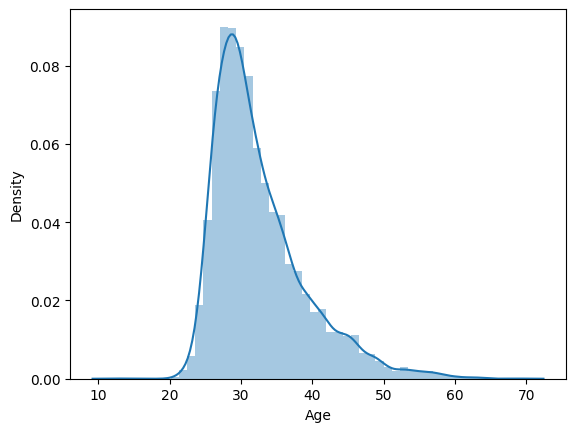

In [ ]:
import seaborn as sns
sns.distplot(hf['Age'],kde=True)

<ipython-input-44-5d951643bdcc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hf['Exp'],kde=True)


<Axes: xlabel='Exp', ylabel='Density'>

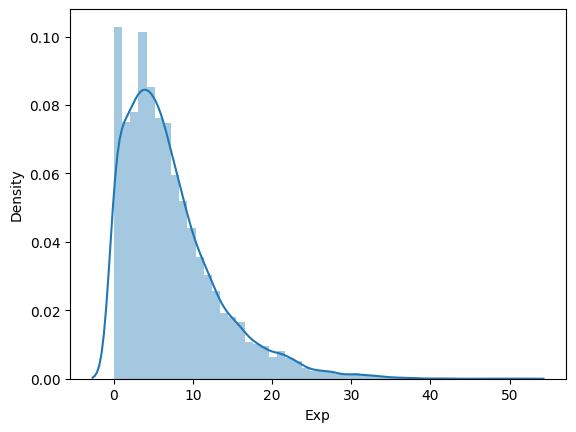

In [ ]:
import seaborn as sns
sns.distplot(hf['Exp'],kde=True)

In [ ]:
len(hf[hf['Exp']==10]),len(hf[hf['Exp']==11])

(50, 31)

In [ ]:
hfgbcat.reset_index(inplace=True)

In [ ]:
hfgbcat['CallToApply']=hfgbcat['Shortlisted']/hfgbcat['TotalApply']

In [ ]:
hfgbcat.sort_values(['CallToApply'],ascending=False)

,Cat,User ID,Age,Exp,TotalApply,Shortlisted,AvgJobsApplied,CallToApply
46,Waiter/Waitress,5337464,25.1,4.00,26,6.0,2.17,0.230769
42,Security Guard,13011375,111.1,6.01,80,11.0,6.66,0.137500
37,Plumber/Pipe fitting,3047926,28.6,0.00,25,3.0,2.08,0.120000
4,CAD Operator,10616397,96.6,31.50,63,6.0,5.25,0.095238
41,Secretary/Receptionist,95253182,1007.9,212.23,763,61.0,63.57,0.079948
12,Driving/Motor Technician,63758744,487.3,157.12,332,21.0,27.66,0.063253
10,Design/Creative,95745060,1291.7,370.03,1045,56.0,87.07,0.053589
47,Welder,4963924,36.1,2.20,39,2.0,3.25,0.051282
36,Peon,27842684,189.4,40.40,184,9.0,15.32,0.048913
35,Pathologist/ Lab Assistant,30664820,195.3,37.01,164,8.0,13.66,0.048780


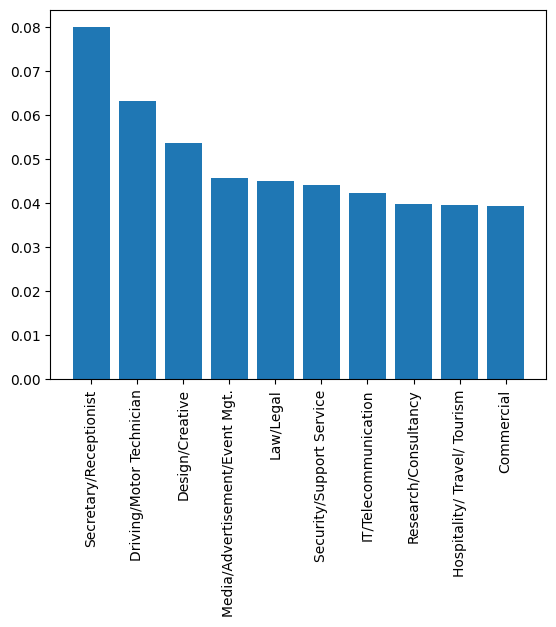

In [ ]:
a=hfgbcat[hfgbcat['TotalApply']>200].sort_values(['CallToApply'],ascending=False).head(10)
plt.bar(a['Cat'],a['CallToApply'])
plt.xticks(rotation=90,fontsize=10)
plt.savefig('Cat-CallToApply-WithoutSmall.png')

In [ ]:
hf[hf['Cat']=='Security Guard']

,User ID,Age,Exp,Cat,TotalApply,Shortlisted,B/W,AvgJobsApplied,AgeCat,ExpCat
7097,3095482,39.0,3.11,Security Guard,25,5.0,blue,2.08,Elderly30-40,Beginner2-5
11356,4855573,45.6,0.00,Security Guard,24,1.0,blue,2.00,Old40-100,NaN
11823,5060320,26.5,2.90,Security Guard,31,5.0,blue,2.58,Adult25-30,Beginner2-5


<ipython-input-105-eec41b609d19>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=pd.DataFrame(hf.groupby(['B/W']).sum())['Shortlisted']/pd.DataFrame(hf.groupby(['B/W']).sum())['TotalApply']
<ipython-input-105-eec41b609d19>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=pd.DataFrame(hf.groupby(['B/W']).sum())['Shortlisted']/pd.DataFrame(hf.groupby(['B/W']).sum())['TotalApply']


FileNotFoundError: ignored

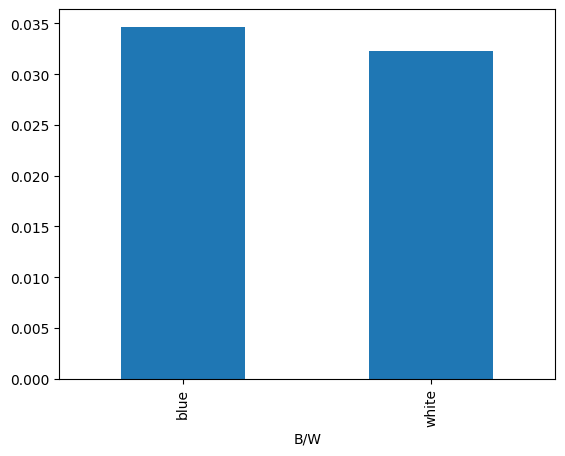

In [ ]:
b=pd.DataFrame(hf.groupby(['B/W']).sum())['Shortlisted']/pd.DataFrame(hf.groupby(['B/W']).sum())['TotalApply']
b.plot(kind='bar')
plt.savefig('CallToApplyB/W.png')

In [ ]:
177/5105,10790/333879

(0.0346718903036239, 0.03231709691235447)

In [ ]:
hf[['Exp','Shortlisted']].corr()

,Exp,Shortlisted
Exp,1.000000,0.075293
Shortlisted,0.075293,1.000000


In [ ]:
hf.to_csv('HF.csv')
hub.to_csv('HUB.csv')

In [ ]:
hub=hub.iloc[38:]

In [ ]:
hub['TotalApply']=hub['TotalApply'].astype('int64')

<ipython-input-55-94f566dbafa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub['TotalApply']=hub['TotalApply'].astype('int64')


In [ ]:
hub['TotalApply'].mean(),hub['HPApply'].mean()

(2624500.5, 267726.5)

In [ ]:
hub['Shortlisted'].mean(),hub['ShortlistedHP'].mean()

(79321.21428571429, 11672.5)

In [ ]:
hub['Basicapply']=hub['TotalApply']-hub['HPApply']
hub['BasicShortliste']=hub['Shortlisted']-hub['ShortlistedHP']

<ipython-input-58-29ba14c31e43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub['Basicapply']=hub['TotalApply']-hub['HPApply']
<ipython-input-58-29ba14c31e43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub['BasicShortliste']=hub['Shortlisted']-hub['ShortlistedHP']


In [ ]:
hubfd=pd.DataFrame(hub.describe().loc['mean'])

In [ ]:
hubdf=hubfd.transpose()
hubdf

,TotalApply,HPApply,Shortlisted,ShortlistedHP,Users3HP,Basicapply,BasicShortliste
mean,2624500.5,267726.5,79321.214286,11672.5,267726.428571,2356774.0,67648.714286


In [ ]:
hubdf['Shortlisted']/hubdf['TotalApply'], hubdf['BasicShortliste']/hubdf['Basicapply'], hubdf['ShortlistedHP']/hubdf['HPApply']

(mean    0.030223
 dtype: float64,
 mean    0.028704
 dtype: float64,
 mean    0.043599
 dtype: float64)

In [ ]:
hub['TA']=hub['Shortlisted']/hub['TotalApply']
hub['BA']=hub['BasicShortliste']/hub['Basicapply']
hub['HPA']=hub['ShortlistedHP']/hub['HPApply']

<ipython-input-62-b17a6c134bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub['TA']=hub['Shortlisted']/hub['TotalApply']
<ipython-input-62-b17a6c134bf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub['BA']=hub['BasicShortliste']/hub['Basicapply']
<ipython-input-62-b17a6c134bf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

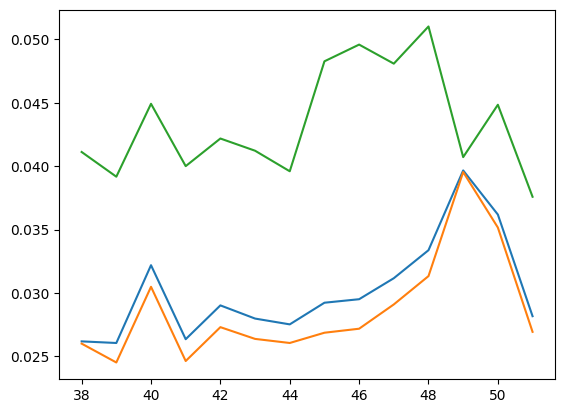

In [ ]:
plt.plot(hub[['TA','BA','HPA']])

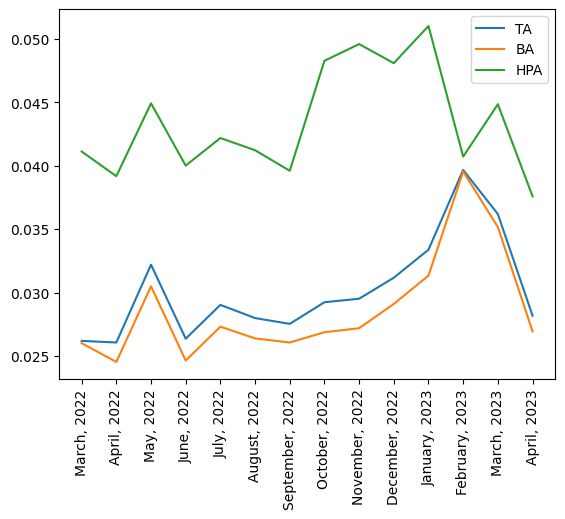

In [ ]:
plt.plot(hub['Month'], hub['TA'], label='TA')
plt.plot(hub['Month'], hub['BA'], label='BA')
plt.plot(hub['Month'], hub['HPA'], label='HPA')

plt.legend()
plt.xticks(rotation=90)
plt.savefig('TA-BA-HP-CtoA.png')

In [ ]:
hf[['Age','Exp']].corr()

,Age,Exp
Age,1.000000,0.865468
Exp,0.865468,1.000000


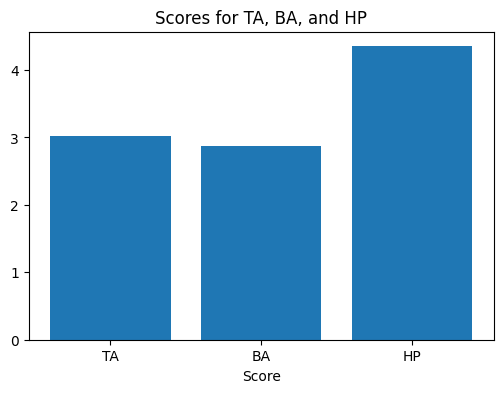

In [9]:
import matplotlib.pyplot as plt

# Data
TA = 3.02
BA = 2.87
HP = 4.35

# Create a horizontal bar chart with reduced figure size
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['TA', 'BA', 'HP'], [TA, BA, HP])

# Add labels and title
ax.set_xlabel('Score')
ax.set_title('Scores for TA, BA, and HP')
plt.savefig('COmparison.png')

# Show the plot
plt.show()
